## Analysis of the datset

### Preliminary work

Importing the necessary libraries and loading the dataset

In [11]:
#!pip install pandas
#!pip install matplotlib
#!pip install seaborn
#!pip install imbalanced-learn

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


### Importing the datasets

For the first study, we are going to focus on 5 main different kinds of attacks, namely:
- DDos
- PortScan
- WebAttack: Brute Force
- WebAttack: XSS
- WebAttack: Sql Injection

This is because these are the most common types of attacks that are faced by organizations.

This 5 attacks are gathered in 3 different datasets, namely:

- Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv (contains WebAttack: Brute Force, WebAttack: XSS, WebAttack: Sql Injection)
- Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv (contains DDoS)
- Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv (contains PortScan)

Before we can merge the datasets, we need to check if they have the same columns and if they have the same data types.


In [13]:
dataDdos = pd.read_csv('Datasets/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv')
dataPortScan = pd.read_csv('Datasets/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv')
dataWebAttacks = pd.read_csv('Datasets/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv')

In [14]:
# Check if the columns of the three datasets are the same
columns_ddos = set(dataDdos.columns)
columns_portscan = set(dataPortScan.columns)
columns_webattacks = set(dataWebAttacks.columns)

# Check if all columns are the same
if columns_ddos == columns_portscan == columns_webattacks:
    print("All datasets have the same columns.")
else:
    print("The datasets do not have the same columns.")
    print("Columns in dataDdos but not in dataPortScan:", columns_ddos - columns_portscan)
    print("Columns in dataPortScan but not in dataDdos:", columns_portscan - columns_ddos)
    print("Columns in dataDdos but not in dataWebAttacks:", columns_ddos - columns_webattacks)
    print("Columns in dataWebAttacks but not in dataDdos:", columns_webattacks - columns_ddos)
    print("Columns in dataPortScan but not in dataWebAttacks:", columns_portscan - columns_webattacks)
    print("Columns in dataWebAttacks but not in dataPortScan:", columns_webattacks - columns_portscan)

All datasets have the same columns.


Knowing the data types of the columns is important because we need to know if we need to convert the data types of the columns to the same data type before merging the datasets.

In [15]:
# Check if the datatypes of the columns are the same
dtypes_ddos = dataDdos.dtypes
dtypes_portscan = dataPortScan.dtypes
dtypes_webattacks = dataWebAttacks.dtypes

# Compare the datatypes
if dtypes_ddos.equals(dtypes_portscan) and dtypes_ddos.equals(dtypes_webattacks):
    print("All datasets have the same datatypes.")
else:
    print("The datasets do not have the same datatypes.")
    print("Datatypes in dataDdos but not in dataPortScan:", dtypes_ddos[dtypes_ddos != dtypes_portscan])
    print("Datatypes in dataPortScan but not in dataDdos:", dtypes_portscan[dtypes_portscan != dtypes_ddos])
    print("Datatypes in dataDdos but not in dataWebAttacks:", dtypes_ddos[dtypes_ddos != dtypes_webattacks])
    print("Datatypes in dataWebAttacks but not in dataDdos:", dtypes_webattacks[dtypes_webattacks != dtypes_ddos])
    print("Datatypes in dataPortScan but not in dataWebAttacks:", dtypes_portscan[dtypes_portscan != dtypes_webattacks])
    print("Datatypes in dataWebAttacks but not in dataPortScan:", dtypes_webattacks[dtypes_webattacks != dtypes_portscan])

All datasets have the same datatypes.


With all this information, we can now merge the datasets. Also, from now on the objective variable will be renamed from 'Label' to 'AttackType' for better understanding.

In [16]:
data = pd.concat([dataDdos, dataPortScan, dataWebAttacks], ignore_index=True)

data.rename(columns={' Label': 'AttackType'}, inplace=True)
data.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,AttackType
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [17]:
data.shape

(682578, 79)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682578 entries, 0 to 682577
Data columns (total 79 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0    Destination Port             682578 non-null  int64  
 1    Flow Duration                682578 non-null  int64  
 2    Total Fwd Packets            682578 non-null  int64  
 3    Total Backward Packets       682578 non-null  int64  
 4   Total Length of Fwd Packets   682578 non-null  int64  
 5    Total Length of Bwd Packets  682578 non-null  int64  
 6    Fwd Packet Length Max        682578 non-null  int64  
 7    Fwd Packet Length Min        682578 non-null  int64  
 8    Fwd Packet Length Mean       682578 non-null  float64
 9    Fwd Packet Length Std        682578 non-null  float64
 10  Bwd Packet Length Max         682578 non-null  int64  
 11   Bwd Packet Length Min        682578 non-null  int64  
 12   Bwd Packet Length Mean       682578 non-nul

In [19]:
data.describe()

/Users/nico/Desktop/UPC/PAE/SentinelX/.venv/lib/python3.12/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/Users/nico/Desktop/UPC/PAE/SentinelX/.venv/lib/python3.12/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,682578.00000,6.825780e+05,682578.000000,682578.000000,6.825780e+05,6.825780e+05,682578.000000,682578.000000,682578.000000,682578.000000,...,682578.000000,682578.000000,6.825780e+05,6.825780e+05,6.825780e+05,6.825780e+05,6.825780e+05,6.825780e+05,6.825780e+05,6.825780e+05
mean,8284.05987,1.073992e+07,6.844917,7.488039,5.476798e+02,1.105234e+04,253.990678,19.231081,76.681420,93.185085,...,4.797077,25.692999,9.398854e+04,2.558041e+04,1.425875e+05,8.036747e+04,5.007637e+06,1.252958e+06,5.895053e+06,4.094000e+06
std,17649.21285,2.842181e+07,561.327339,746.989279,4.459053e+03,1.729496e+06,1135.183644,97.414535,305.066587,478.007235,...,538.657048,7.310512,6.335576e+05,2.786464e+05,8.632056e+05,6.012721e+05,1.569456e+07,7.612084e+06,1.847828e+07,1.446522e+07
min,0.00000,-1.300000e+01,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,53.00000,6.600000e+01,1.000000,1.000000,2.000000e+00,6.000000e+00,2.000000,0.000000,2.000000,0.000000,...,0.000000,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,80.00000,3.081500e+04,2.000000,1.000000,2.600000e+01,4.600000e+01,20.000000,2.000000,8.666667,0.000000,...,1.000000,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,3607.75000,1.869396e+06,4.000000,4.000000,7.800000e+01,3.380000e+02,45.000000,30.000000,41.110677,10.263203,...,3.000000,32.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,65532.00000,1.200000e+08,200755.000000,270686.000000,1.197199e+06,6.270000e+08,23360.000000,1729.000000,4183.057143,6692.644993,...,192491.000000,60.000000,1.100000e+08,7.050000e+07,1.100000e+08,1.100000e+08,1.200000e+08,7.260000e+07,1.200000e+08,1.200000e+08


We want to check for NaN, -inf, +inf values in the dataset and remove them if they exist.

In [20]:
data.replace([np.inf, -np.inf], np.nan, inplace=True)
nan_values = data.isna().sum().sum()
print(f'Total NaN values: {nan_values}')
print(f'Percentage of NaN values: {nan_values / data.size * 100:.2f}%')

Total NaN values: 1080
Percentage of NaN values: 0.00%


As there are not many, we can remove them without affecting the dataset.

In [21]:
data.dropna(inplace=True)

### Analysis of the different kinds of attacks

We want to see if the attacks are balanced or not. We can do this by checking the number of attacks in each dataset.


AttackType
BENIGN                        393029
PortScan                      158804
DDoS                          128025
Web Attack � Brute Force        1507
Web Attack � XSS                 652
Web Attack � Sql Injection        21
Name: count, dtype: int64


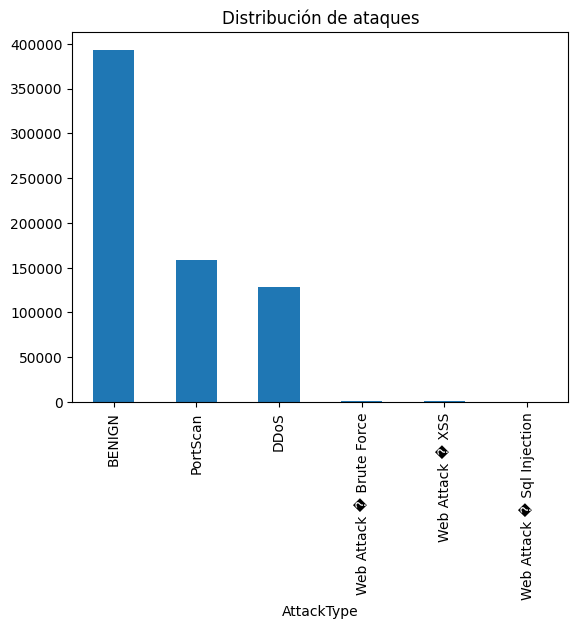

In [22]:
data['AttackType'].value_counts().plot(kind='bar', title='Distribución de ataques')
print(data['AttackType'].value_counts())


As we can see from the results, the attacks are not balanced. This is a problem because the model will be biased towards the attack with the most number of instances. To solve this problem, we could undersample the dataset with the most number of instances or oversample the dataset with the least number of instances.

We are going to try both methods and see which one gives the best results, and also try a random forest with balanced class weights to take it as a baseline.

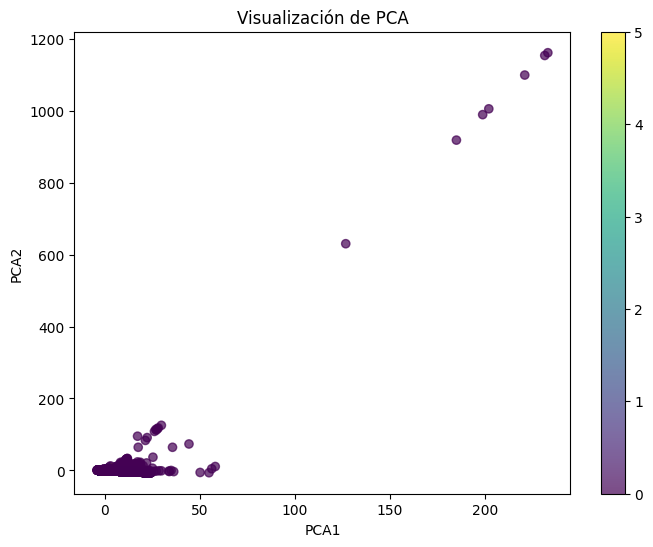

In [23]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data.select_dtypes(include=['float64', 'int64']))

# Aplica PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# Visualiza los dos primeros componentes principales
data['pca1'] = pca_result[:, 0]
data['pca2'] = pca_result[:, 1]

plt.figure(figsize=(8, 6))
plt.scatter(data['pca1'], data['pca2'], c=data['AttackType'].astype('category').cat.codes, cmap='viridis', alpha=0.7)
plt.colorbar()
plt.title('Visualización de PCA')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()


In [24]:
data.drop(columns=['pca1', 'pca2'], inplace=True)

### Correlation Analysis

For the correlation analysis, we will use the Pearson correlation matrix. The Pearson correlation matrix is a measure of the strength of a linear relationship between two continuous variables. The Pearson correlation ranges between -1 and 1. A value of 1 means there is a perfect positive correlation between the two variables, a value of -1 means there is a perfect negative correlation between the two variables, and a value of 0 means there is no correlation between the two variables.

To do this, we need to transform the categorical variables into numerical ones. For this, we will use the LabelEncoder method from the sklearn library.

In [25]:
data['AttackType'] = LabelEncoder().fit_transform(data['AttackType'])

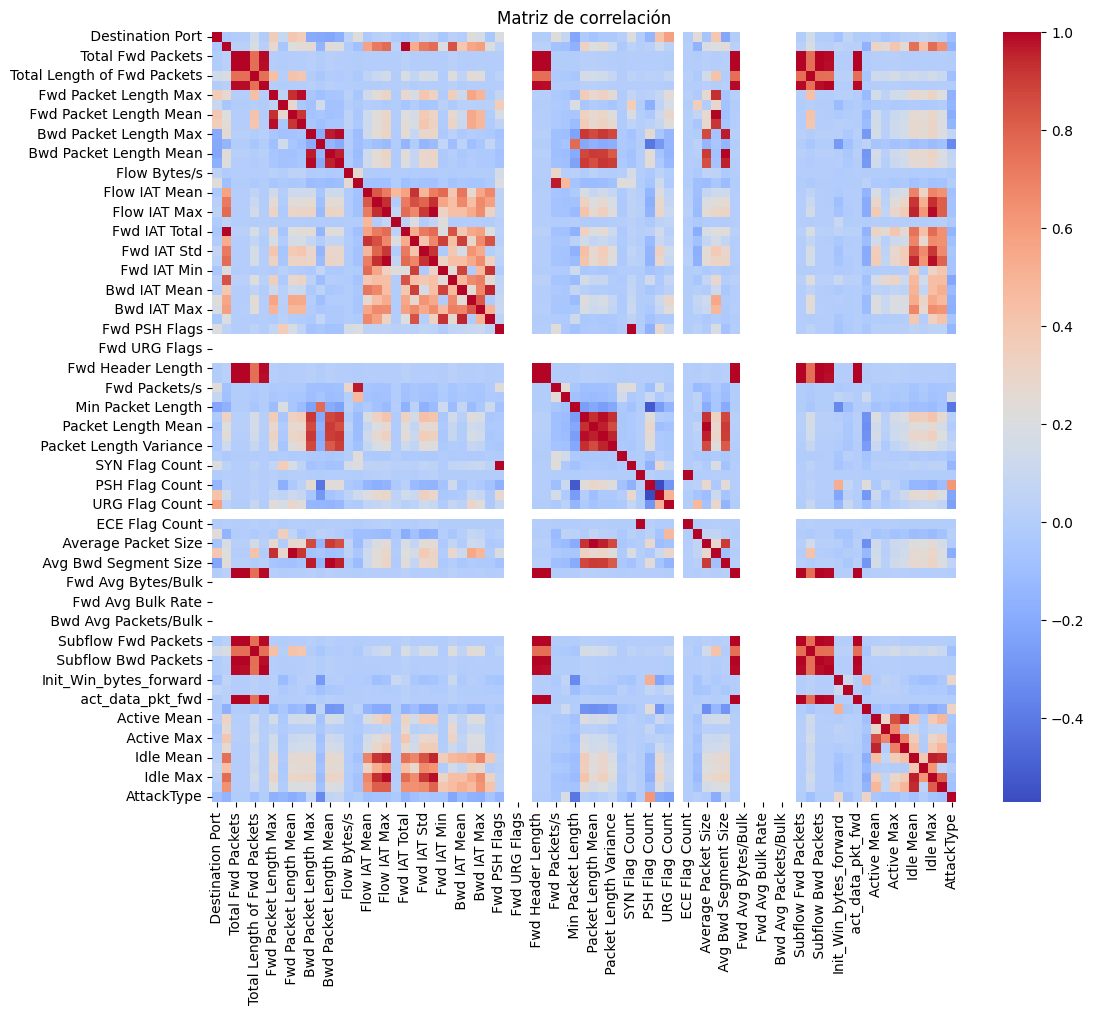

In [26]:
plt.figure(figsize=(12, 10))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False)
plt.title('Matriz de correlación')
plt.show()

As we can see, AttackType does not have much correlation with any of the variables, which means there is no linear relationship between AttackType and the other variables.

This suggests that we will need non-linear models to predict AttackType.



### Oversampling the dataset

We are going to try oversampling the dataset so that the classes that have the least number of instances will have the same number of instances as the class with the most number of instances.

For that we are going to use the SMOTE algorithm. This algorithm creates synthetic samples of the minority class by selecting two or more similar instances and creating a new instance that is a linear combination of the selected instances.

We will check if there are any  NaN, inf and -inf values from the dataset before we can use the SMOTE algorithm. If there are not much we will replace -inf and inf to NaN and then drop the NaN values.


In [27]:
smote = SMOTE()
X = data.drop(columns=['AttackType'])
y = data['AttackType']

X_resampled, y_resampled = smote.fit_resample(X, y)

AttackType
0    393029
1    393029
2    393029
3    393029
5    393029
4    393029
Name: count, dtype: int64


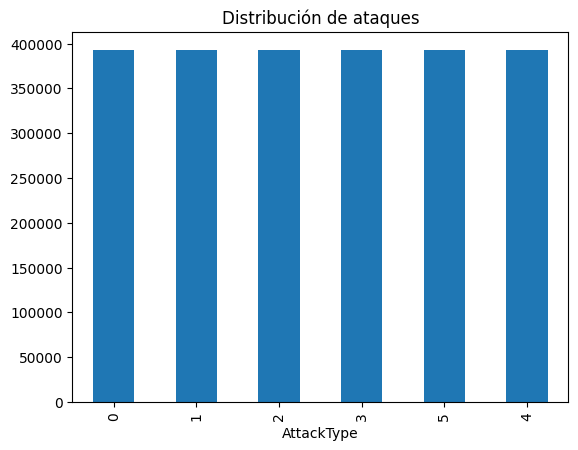

In [28]:
y_resampled.value_counts().plot(kind='bar', title='Distribución de ataques')
print(y_resampled.value_counts())

As we can see from the results, the dataset is now balanced. We can now use this dataset to train the model.

## Setting a baseline

We are going to use a random forest with balanced class weights as a baseline. We are going to use the original dataset to train the model.

In [29]:
rf = RandomForestClassifier(class_weight='balanced')

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    117794
           1       1.00      1.00      1.00     38496
           2       1.00      1.00      1.00     47696
           3       0.71      0.83      0.76       424
           4       1.00      0.14      0.25         7
           5       0.44      0.28      0.34       195

    accuracy                           1.00    204612
   macro avg       0.86      0.71      0.73    204612
weighted avg       1.00      1.00      1.00    204612



In [31]:
rf_unbalanced = RandomForestClassifier()

In [32]:
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

rf_unbalanced.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier()

In [33]:
y_pred_resampled = rf.predict(X_test_resampled)

print(classification_report(y_test_resampled, y_pred_resampled))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89    117854
           1       1.00      1.00      1.00    117679
           2       1.00      1.00      1.00    117628
           3       0.57      0.91      0.70    118420
           4       1.00      0.50      0.66    118091
           5       0.89      0.57      0.70    117781

    accuracy                           0.83    707453
   macro avg       0.88      0.83      0.83    707453
weighted avg       0.88      0.83      0.83    707453

